In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [ ]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [4]:
y.shape

(70000,)

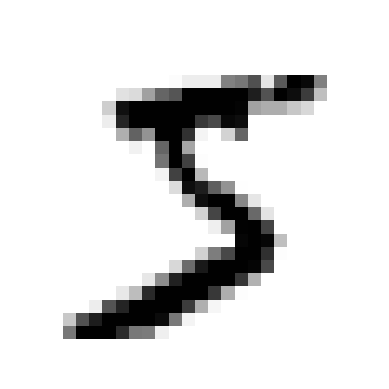

In [ ]:
from sklearn.datasets import fetch_openml
import matplotlib as mpl
import matplotlib.pyplot as plt


mnist = fetch_openml('mnist_784', version=1)
X, y = mnist["data"], mnist["target"]

# Select the first digit
some_digit = X.iloc[0]  
some_digit_image = some_digit.values.reshape(28, 28)  

# Plot the digit
plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

In [6]:
y[0]

'5'

In [ ]:
import numpy as np
y = y.astype(np.uint8)

In [8]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

## 1.Training a Binary Classifier :
### is able to disiguish between just tow calsses 5 and not 5

In [ ]:
y_train_5 = (y_train == 5) 
# True for all 5s, False for all other digits
y_test_5 = (y_test == 5)

# Stochastic Gradient Descent (SGD) Classifier

## Using Scikit-Learn’s SGDClassifier Class
- Efficiently handles very large datasets.
- Trains instances independently, one at a time (suitable for online learning).

## Note:
- The SGDClassifier relies on randomness during training (hence the name “stochastic”).
- For reproducible results, set the `random_state` parameter.

In [ ]:
from sklearn.linear_model import SGDClassifier 
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [ ]:
sgd_clf.predict([some_digit])


c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

<span style="color:#f2e86d; font-weight: bold; font-size: 24px;">2.performance measures</span>

<span style="color:pink; font-weight: bold; font-size: 16px;">2.a Measuring Accuracy Using Cross-Validation</span>


In [ ]:
from sklearn.model_selection import StratifiedKFold 
from sklearn.base import clone  
skfolds = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)  
for train_index, test_index in skfolds.split(X_train, y_train_5):
  clone_clf = clone(sgd_clf) 
  X_train_folds = X_train.iloc[train_index] 
  y_train_folds = y_train_5.iloc[train_index] 
  X_test_fold = X_train.iloc[test_index] 
  y_test_fold = y_train_5.iloc[test_index]  
  clone_clf.fit(X_train_folds, y_train_folds) 
  y_pred = clone_clf.predict(X_test_fold) 
  n_correct = sum(y_pred == y_test_fold)  
  print(n_correct / len(y_pred))

0.9669
0.91625
0.96785


Let’s use the cross_val_score() it returns the accurency of each fold 


In [ ]:
from sklearn.model_selection import cross_val_score  
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [ ]:
from sklearn.base import BaseEstimator  
class Never5Classifier(BaseEstimator):
     def fit(self, X, y=None): 
         return self  
     def predict(self, X): 
         return np.zeros((len(X), 1), dtype=bool)

In [ ]:
never_5_clf = Never5Classifier() 
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

<span style="font-size: 18px; color: yellow;">
This demonstrates why accuracy is generally not the preferred performance measure for classifiers, especially when you are dealing with skewed datasets (i.e., when some classes are much more frequent than others).
</span>


<span style="color:pink; font-weight: bold; font-size: 16px;">2b.Confusion Matrix</span>

In [ ]:
from sklearn.model_selection import cross_val_predict

# Perform cross-validation predictions
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)


In [ ]:
from sklearn.metrics import confusion_matrix 
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [ ]:

y_train_perfect_predictions = y_train_5 # pretend we reached perfection 
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]], dtype=int64)


<span style="color:pink; font-weight: bold; font-size: 16px;">2c.RECALL & PRECISION</span>




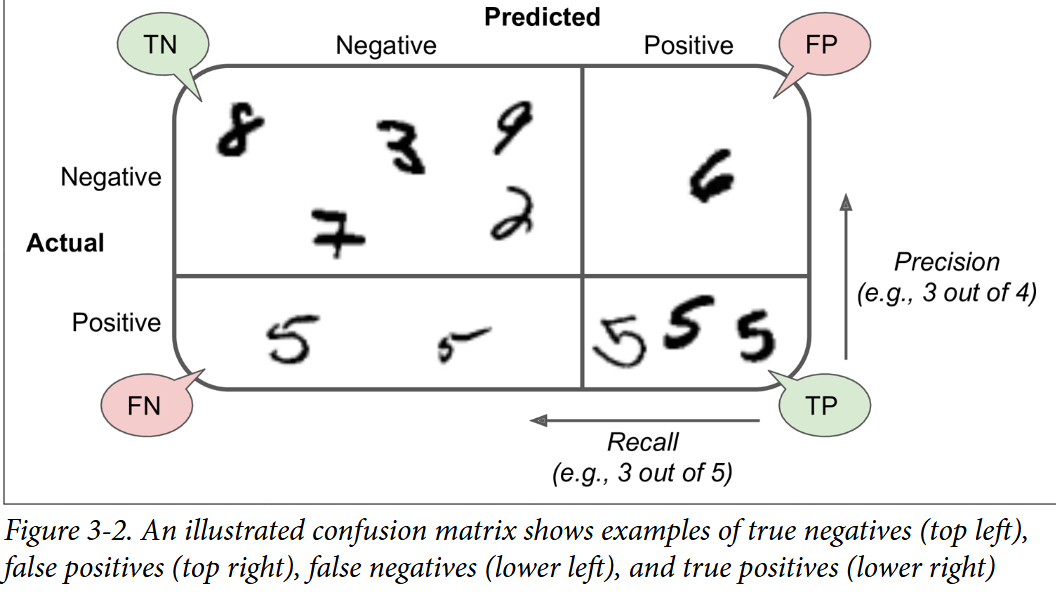

In [ ]:
from sklearn.metrics import precision_score, recall_score  
precision_score(y_train_5, y_train_pred) 

0.8370879772350012

In [20]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311


<span style="color:pink; font-weight: bold; font-size: 16px;">NB:F1 SCORE combine the precion and recall its the harmonic mean f precion and recall</span>



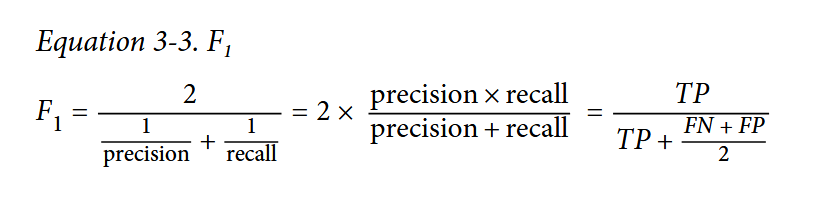


In [ ]:
from sklearn.metrics import f1_score 
f1_score(y_train_5, y_train_pred)

0.7325171197343847

In [ ]:
y_scores = sgd_clf.decision_function([some_digit]) 
y_scores

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([2164.22030239])

In [ ]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)

In [ ]:
threshold = 8000 
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [25]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

In [ ]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

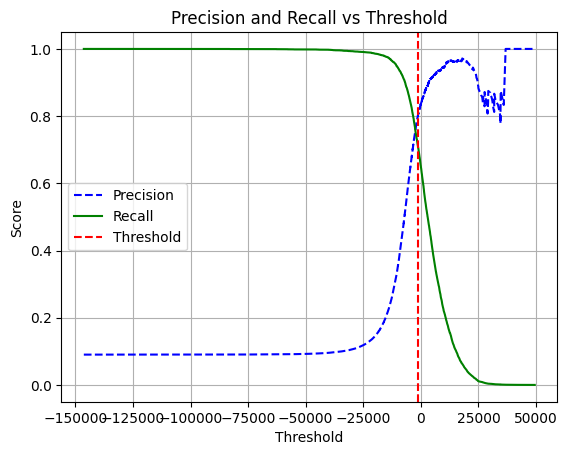

In [36]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds): 
     plt.plot(thresholds, precisions[:-1], "b--", label="Precision") 
     plt.plot(thresholds, recalls[:-1], "g-", label="Recall")  
     plt.xlabel("Threshold")
     plt.ylabel("Score")
     plt.title("Precision and Recall vs Threshold")
     plt.legend(loc="best")
     plt.grid(True)
     plt.axvline(x=thresholds[np.argmax(precisions[:-1] >= 0.8)], color='r', linestyle='--', label='Threshold')
     plt.legend(loc="best")

# Example usage:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

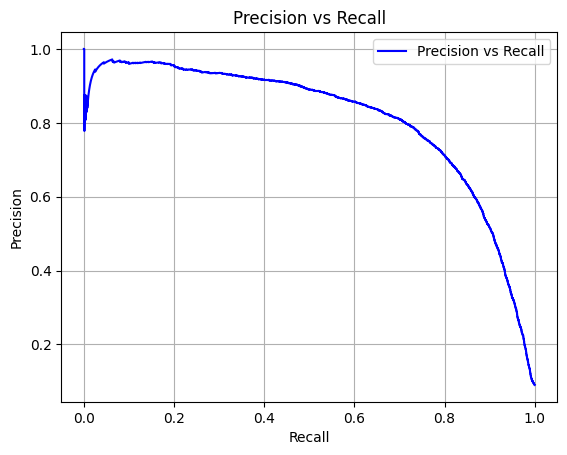

In [ ]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", label="Precision vs Recall")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision vs Recall")
    plt.legend(loc="best")
    plt.grid(True)

# Example usage:
plot_precision_vs_recall(precisions, recalls)
plt.show()